# AI-539 Project: Wine Quality Classification
## Author: Amandeep Singh Chabada
### Date: 3/11/22
#### Data: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [1]:
#Importing Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectKBest
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from simple_colors import *

In [2]:
#Reading datasets for red wine quality
df_red = pd.read_csv("winequality-red.csv",sep = ';',header = 0)
#df_red=df.sample(frac=0.8,random_state=2)
#df_red_val=df.drop(df_red.index)

In [3]:
#Method to Split X and Y
def split_X_Y(df):
    X = df.drop('quality',axis = 1)
    Y = df['quality']
    #X_train, X_test, y_train, y_test = train_test_split(X_dev, y_dev, test_size = 0.25,random_state = 2, shuffle = False)
    return X, Y

## Exploring Red Wine Dataset

In [4]:
#Dataset profile
df_red.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
#Median
pd.DataFrame(df_red.median(),columns = {"Median"})

,Median
fixed acidity,7.90000
volatile acidity,0.52000
citric acid,0.26000
residual sugar,2.20000
chlorides,0.07900
free sulfur dioxide,14.00000
total sulfur dioxide,38.00000
density,0.99675
pH,3.31000
sulphates,0.62000


In [6]:
#Missing Values
pd.DataFrame(df_red.isna().sum(),columns = {"Missing Values"})

,Missing Values
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
#Classes
set(df_red["quality"])

{3, 4, 5, 6, 7, 8}

In [8]:
#Random Sample
df_red.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
711,8.9,0.565,0.34,3.0,0.093,16.0,112.0,0.9998,3.38,0.61,9.5,5


In [9]:
#Best quality wine sample
df_red.loc[df_red["quality"]==8].sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


In [10]:
#Worst quality wine sample
df_red.loc[df_red["quality"]==3].sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3


## Initial Findings


Red Wine Histogram


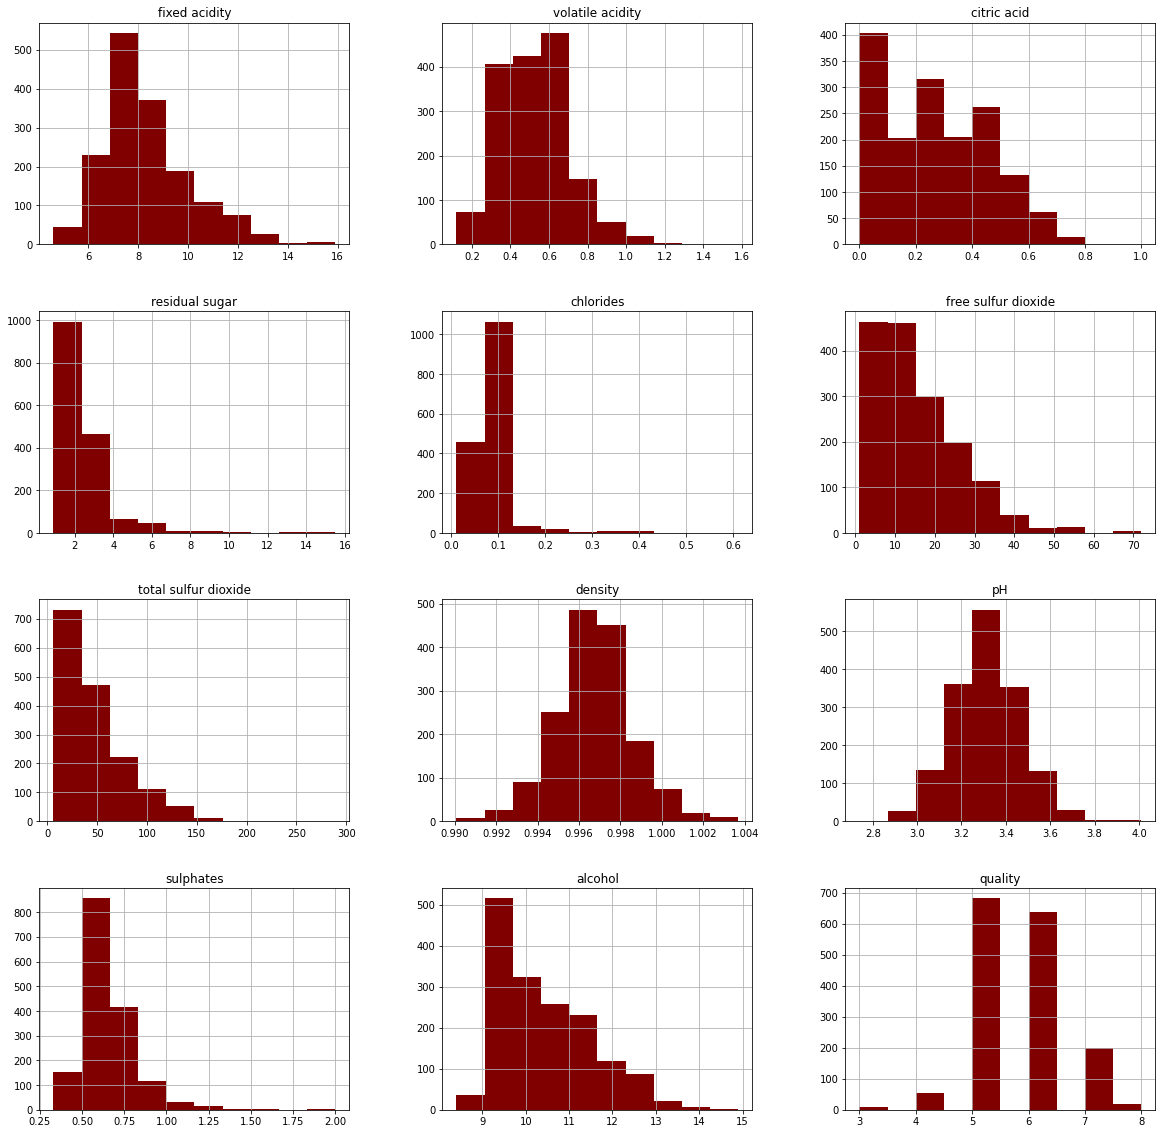

In [11]:
#Histogram to check distribution
print("Red Wine Histogram")
df_red.hist(figsize = (20,20),color = "maroon");

<AxesSubplot:>

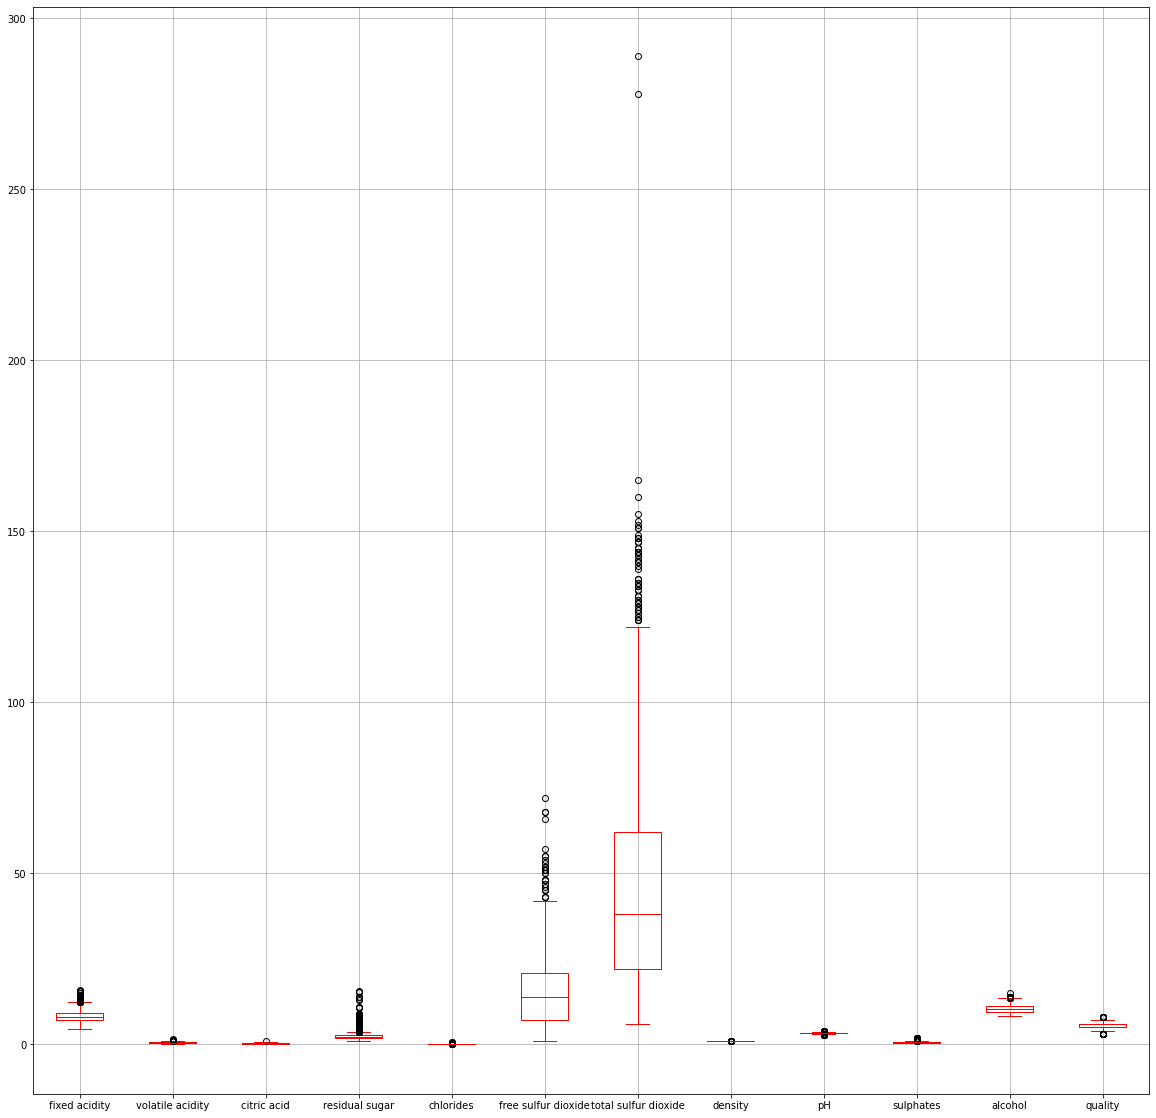

In [12]:
#Boxplots for checking outliers in the data
df_red.boxplot(figsize = (20,20),color = "red")

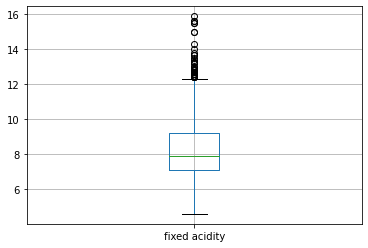

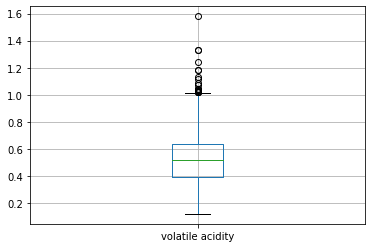

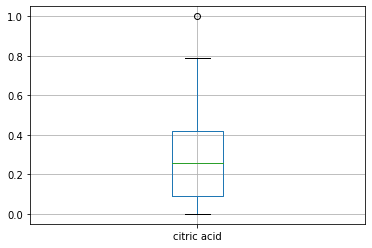

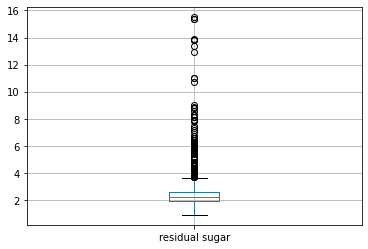

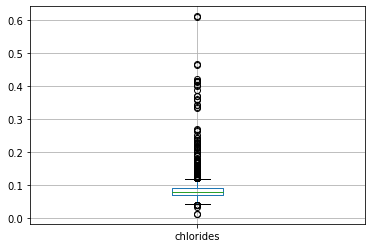

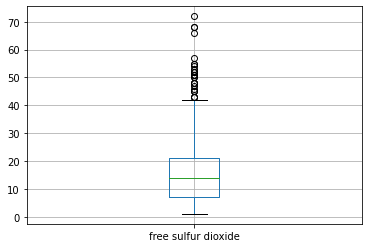

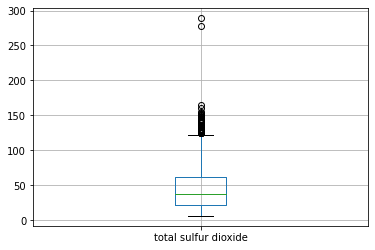

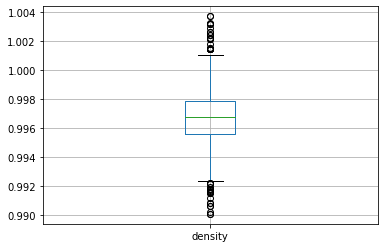

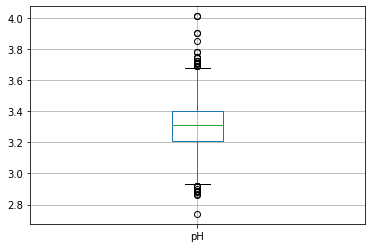

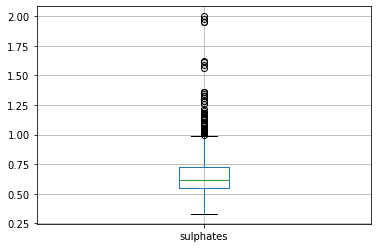

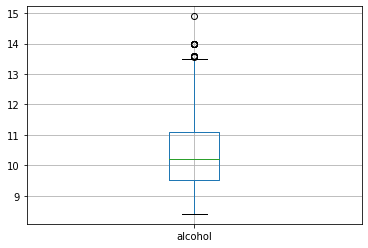

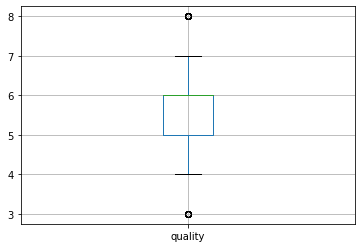

In [13]:
#Individual boxplots due to non-uniform scale
for i in range(df_red.shape[1]):
    plt.figure()
    df_red.iloc[:,[i]].boxplot();

In [14]:
#Checking outliers with data
df_red.describe(percentiles = [0.05,0.25,0.5,0.75,0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,6.100000,7.1000,7.90000,9.200000,11.8000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.270000,0.3900,0.52000,0.640000,0.8400,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.000000,0.0900,0.26000,0.420000,0.6000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.590000,1.9000,2.20000,2.600000,5.1000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.054000,0.0700,0.07900,0.090000,0.1261,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,4.000000,7.0000,14.00000,21.000000,35.0000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,11.000000,22.0000,38.00000,62.000000,112.1000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.993598,0.9956,0.99675,0.997835,1.0000,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.060000,3.2100,3.31000,3.400000,3.5700,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.470000,0.5500,0.62000,0.730000,0.9300,2.00000


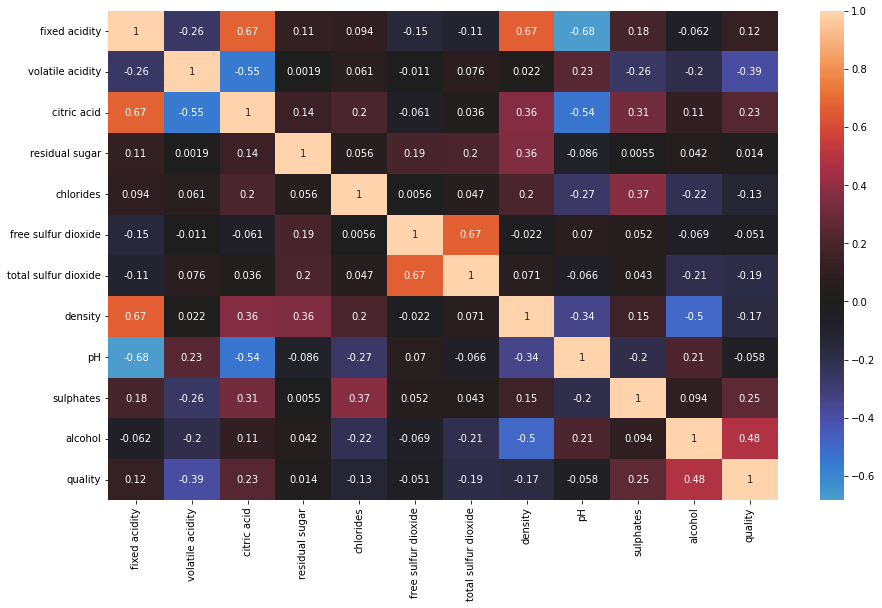

In [15]:
#Correlation Matrix
plt.figure(figsize=(15,9))
sns.heatmap(df_red.corr(),annot=True,center=0);

In [16]:
#Checking collinearity with Response Variable (Quality)
df_red.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

/Users/amandeepchabada/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

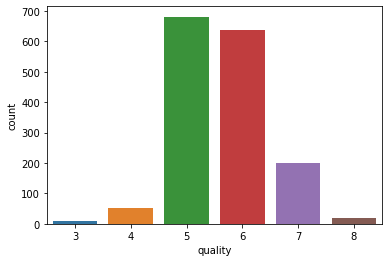

In [17]:
#Checking class distribution
sns.countplot(df_red['quality'])
df_red['quality'].value_counts()

## Handling Data Issues

### Outliers

In [18]:
#Dropping outliers
def drop_outliers(df):
    df_drop = df
    for cols in df.drop('quality',axis = 1).columns:
        #print(cols)
        df_drop = df_drop[df_drop[cols]>df_drop[cols].quantile(0.02)]
        #df_drop[cols] = df[df_drop[cols]>df_drop[cols].quantile(0.05)]
        if cols == 'residual sugar':
            df_drop = df_drop[df_drop[cols]<df_drop[cols].quantile(0.90)]
        else:
            df_drop = df_drop[df_drop[cols]<df_drop[cols].quantile(0.95)]
#     df_drop.boxplot(figsize = (20,20),color = "blue");
#     plt.show()
    return df_drop

In [19]:
#Winsorizing
def winsorize_outliers(df):
    df_red_wins = df
    for cols in df.drop('quality',axis = 1).columns:
        if cols == 'residual sugar':
            wins_window = [0.02,0.1]
        else:
            wins_window = [0.02,0.05]
        #df_red_wins.loc[:, cols] = winsorize(df.loc[:, cols], limits=wins_window)
        df_red_wins[cols] = winsorize(df[cols],limits=wins_window)
#     df_red_wins.boxplot(figsize = (20,20),color = "red");
#     plt.show()
    return df_red_wins

In [20]:
#Median Imputation
def median_imputation(df):
    df_med = df
    for cols in df.drop('quality',axis = 1).columns:
        median = np.ma.median(df_med[cols])
        df_med[cols] = np.where(df_med[cols]<df_med[cols].quantile(0.02), median,df[cols])
        if cols == 'residual sugar':
            df_med[cols] = np.where(df[cols]>df_med[cols].quantile(0.90), median,df[cols])
        else:
            df_med[cols] = np.where(df[cols]>df_med[cols].quantile(0.95), median,df[cols])
#     df_med.boxplot(figsize = (20,20),color = "green");
#     plt.show()
    return df_med

In [21]:
#Square Root Transformation (NOT USED)
def square_root_transformation(df):
    df_sr = df
    for cols in df.drop('quality',axis = 1).columns:
        df_sr[cols] = np.sqrt(df[cols])
    return df_sr

### Imbalanced Classes

In [22]:
#Oversampling
def over_sample(df):
    #X_train, X_test, y_train, y_test = generate_test_train(df)
    X,Y  = split_X_Y(df)
    oversample = RandomOverSampler(random_state = 4)
    X_over, y_over = oversample.fit_resample(X, Y)
    df_over = X_over
    df_over['quality'] = y_over
    return df_over

In [23]:
#Undersampling
def under_sample(df):
    #X_train, X_test, y_train, y_test = generate_test_train(df)
    X,Y  = split_X_Y(df)
    undersample = RandomUnderSampler(random_state = 4)
    X_under, y_under = undersample.fit_resample(X, Y)
    df_under = X_under
    df_under['quality'] = y_under
    return df_under

In [24]:
#Cost Weighting
def cost_weighting(df):
    #X_train, X_test, y_train, y_test = generate_test_train(df)
    X,Y  = split_X_Y(df)
    cls_wt = compute_class_weight(class_weight = "balanced", classes = np.unique(Y),y = Y)
    cls_wt = dict(zip(np.unique(Y), cls_wt))
    return df,cls_wt
    

### Non-Uniform range of features

In [25]:
#MinMax Scaler
def min_max_scaler(df):
    df_scaled = df
    scaler = MinMaxScaler()
    for cols in df.drop('quality',axis=1):
        df_scaled[[cols]] = scaler.fit_transform(df[[cols]])
    df_scaled['quality'] = df['quality']
    return df_scaled
    

In [26]:
#Z-score normalization
def z_score_normalization(df):
    df_zs = df
    scaler = StandardScaler()
    for cols in df.drop('quality',axis=1):
        df_zs[[cols]] = scaler.fit_transform(df[[cols]])
    df_zs['quality'] = df['quality']
    return df_zs

In [27]:
#Robust Scaler
def robust_scaler(df):
    df_r_scaled = df
    scaler = RobustScaler()
    for cols in df.drop('quality',axis=1):
        df_r_scaled[[cols]] = scaler.fit_transform(df[[cols]])
    df_r_scaled['quality'] = df['quality']
    return df_r_scaled
    

## Testing Classifiers

In [28]:
#Helper function to create split
def test_train_split(df):    
    df_train = df.sample(frac=0.8,random_state=4)
    df_val = df.drop(df_train.index).sample(frac=0.5,random_state=4)
    df_test = df.drop(df_train.index).drop(df_val.index)
    return df_train,df_val,df_test 

In [29]:
#Helper function to evaluate classifiers
def update_results(clf,X_train,X_test,y_train,y_test):
    y_pred_test = clf.fit(X_train, y_train).predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)*100.0
    f1 = f1_score(y_test, y_pred_test, average = 'macro',zero_division=0)
    #print(classification_report(y_test, y_pred_test,zero_division = 0))
    #prec =  precision_score(y_test, y_pred_test, average='macro',zero_division = 0)
    #recall = recall_score(y_test, y_pred_test, average='macro',zero_division= 0)
    #sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,center=0);
    #plt.show()
    return str(int(test_acc))+'%',round(f1,2)


In [30]:
#Function to compare classifiers
def test_classifiers(df_train,df_val,df_test,cls_wt):
    #Genarating test and train splits for the data
    
    X_train, y_train = split_X_Y(df_train)
    X_val, y_val = split_X_Y(df_val)
    X_test, y_test = split_X_Y(df_test)
    
    #Baseline
    d_clf = DummyClassifier(strategy="most_frequent",random_state = 4)
    v_acc,v_f1=update_results(d_clf,X_train,X_val,y_train,y_val)
    t_acc,t_f1=update_results(d_clf,X_train,X_test,y_train,y_test)
    
    val_acc = {
        "Baseline: Most Frequent ": v_acc
    }
    val_f1_score = {
        "Baseline: Most Frequent ": v_f1
    }
    test_acc = {
        "Baseline: Most Frequent ": t_acc
    }
    test_f1_score = {
        "Baseline: Most Frequent ": t_f1
    }

    #SVM
    svm_clf = svm.SVC(kernel = 'poly', random_state = 4,class_weight = cls_wt)
    v_acc,v_f1=update_results(svm_clf,X_train,X_val,y_train,y_val)
    t_acc,t_f1=update_results(svm_clf,X_train,X_test,y_train,y_test)
    
    val_acc["SVM"] = v_acc
    val_f1_score["SVM"] = v_f1
    test_acc["SVM"] = t_acc
    test_f1_score["SVM"] = t_f1

    #Random Forest
    rf_clf = RandomForestClassifier(n_jobs = -1,n_estimators = 100, criterion = 'gini',max_depth = 15,class_weight = cls_wt, random_state = 4)
    v_acc,v_f1=update_results(rf_clf,X_train,X_val,y_train,y_val)
    t_acc,t_f1=update_results(rf_clf,X_train,X_test,y_train,y_test)
    
    val_acc["Random Forest"] = v_acc
    val_f1_score["Random Forest"] = v_f1
    test_acc["Random Forest"] = t_acc
    test_f1_score["Random Forest"] = t_f1
    
    return val_acc,val_f1_score,test_acc,test_f1_score


In [34]:
#Function to compare methodologies
def test_performance(df):
    
    #Getting test train split
    df_train,df_val,df_test = test_train_split(df)
    
    print("Size of Training Data:",df_train.shape)
    print("Size of Validation Data:",df_val.shape)
    print("Size of Test Data:",df_test.shape)
    
    #Comparing performance
    #No Transformations
    val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_train,df_val,df_test,None)
    output_val_acc = {
        'No Transformations':val_acc
    }
    output_val_f1 = {
        'No Transformations':val_f1_score
    }
    output_test_acc = {
        'No Transformations':test_acc
    }
    output_test_f1 = {
        'No Transformations':test_f1_score
    }
    
    #Drop Outliers
    df_drop = drop_outliers(df_train)
    if df_drop['quality'].value_counts().shape[0] == 1:
        print("Data not sufficient for classification")
    else:
        val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_drop,df_val,df_test,None)
    output_val_acc['Drop Outliers'] = val_acc
    output_val_f1['Drop Outliers'] = val_f1_score
    output_test_acc['Drop Outliers'] = test_acc
    output_test_f1['Drop Outliers'] = test_f1_score
    
    #Winsorize
    df_wins = winsorize_outliers(df_train)
    val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_wins,df_val,df_test,None)
    output_val_acc['Winsorize'] = val_acc
    output_val_f1['Winsorize'] = val_f1_score
    output_test_acc['Winsorize'] = test_acc
    output_test_f1['Winsorize'] = test_f1_score
    
    #Median Imputation
    df_med = median_imputation(df_train)
    val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_med,df_val,df_test,None)
    output_val_acc['Median Imputation'] = val_acc
    output_val_f1['Median Imputation'] = val_f1_score
    output_test_acc['Median Imputation'] = test_acc
    output_test_f1['Median Imputation'] = test_f1_score
    
    #Oversampling
    df_over = over_sample(df_train)
    val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_over,df_val,df_test,None)
    output_val_acc['Oversampling'] = val_acc
    output_val_f1['Oversampling'] = val_f1_score
    output_test_acc['Oversampling'] = test_acc
    output_test_f1['Oversampling'] = test_f1_score
    
    #Undersampling
    df_under = under_sample(df_train)
    val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_under,df_val,df_test,None)
    output_val_acc['Undersampling'] = val_acc
    output_val_f1['Undersampling'] = val_f1_score
    output_test_acc['Undersampling'] = test_acc
    output_test_f1['Undersampling'] = test_f1_score
    
    #Cost Weighting
    df_cw,cls_wt = cost_weighting(df_train)
    val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_cw,df_val,df_test,cls_wt)
    output_val_acc['Cost Weighting'] = val_acc
    output_val_f1['Cost Weighting'] = val_f1_score
    output_test_acc['Cost Weighting'] = test_acc
    output_test_f1['Cost Weighting'] = test_f1_score
    
    #MinMax Scaler
    df_scaled = min_max_scaler(df)
    df_train,df_val,df_test = test_train_split(df_scaled)
    val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_train,df_val,df_test,None)
    output_val_acc['MinMax Scaler'] = val_acc
    output_val_f1['MinMax Scaler'] = val_f1_score
    output_test_acc['MinMax Scaler'] = test_acc
    output_test_f1['MinMax Scaler'] = test_f1_score
    
    #Z-Score Normalization
    df_zs = z_score_normalization(df)
    df_train,df_val,df_test = test_train_split(df_zs)
    val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_train,df_val,df_test,None)
    output_val_acc['Z-Score Normalization'] = val_acc
    output_val_f1['Z-Score Normalization'] = val_f1_score
    output_test_acc['Z-Score Normalization'] = test_acc
    output_test_f1['Z-Score Normalization'] = test_f1_score
    
    #Robust Scaler
    df_r_scaled = robust_scaler(df)
    df_train,df_val,df_test = test_train_split(df_r_scaled)
    val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_train,df_val,df_test,None)
    output_val_acc['Robust Scaler'] = val_acc
    output_val_f1['Robust Scaler'] = val_f1_score
    output_test_acc['Robust Scaler'] = test_acc
    output_test_f1['Robust Scaler'] = test_f1_score


    #Combined 1 - Oversampling, median_imputation and z_score_normalization
    df_comb_1 = z_score_normalization(median_imputation(over_sample(df_train)))
    val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_comb_1,df_val,df_test,None)
    output_val_acc['Combined 1'] = val_acc
    output_val_f1['Combined 1'] = val_f1_score
    output_test_acc['Combined 1'] = test_acc
    output_test_f1['Combined 1'] = test_f1_score
    
    
    #Combined 2 - z_score_normalization and drop outliers
    df_comb_2 = z_score_normalization(drop_outliers(df_train))
    val_acc,val_f1_score,test_acc,test_f1_score = test_classifiers(df_comb_2,df_val,df_test,None)
    output_val_acc['Combined 2'] = val_acc
    output_val_f1['Combined 2'] = val_f1_score
    output_test_acc['Combined 2'] = test_acc
    output_test_f1['Combined 2'] = test_f1_score
    
    #Table Construction
    output_df_val_acc = pd.DataFrame(output_val_acc)
    print(blue('Validation Accuracy', ['bold','underlined']))
    display(output_df_val_acc)
    
    output_df_val_f1 = pd.DataFrame(output_val_f1)
    print(blue('Validation F1 Score', ['bold','underlined']))
    display(output_df_val_f1)

    output_df_test_acc = pd.DataFrame(output_test_acc)
    print(blue('Test Accuracy', ['bold','underlined']))
    display(output_df_test_acc)
    
    output_df_test_f1 = pd.DataFrame(output_test_f1)
    print(blue('Test F1 Score', ['bold','underlined']))
    display(output_df_test_f1)

In [35]:
test_performance(df_red)

Size of Training Data: (1279, 12)
Size of Validation Data: (160, 12)
Size of Test Data: (160, 12)


/Users/amandeepchabada/Library/Python/3.8/lib/python/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Validation Accuracy


,No Transformations,Drop Outliers,Winsorize,Median Imputation,Oversampling,Undersampling,Cost Weighting,MinMax Scaler,Z-Score Normalization,Robust Scaler,Combined 1,Combined 2
Baseline: Most Frequent,46%,46%,46%,46%,0%,0%,46%,46%,46%,46%,0%,46%
SVM,51%,53%,57%,56%,46%,38%,45%,58%,61%,51%,58%,53%
Random Forest,67%,60%,65%,67%,68%,38%,68%,66%,66%,67%,56%,55%


Validation F1 Score


,No Transformations,Drop Outliers,Winsorize,Median Imputation,Oversampling,Undersampling,Cost Weighting,MinMax Scaler,Z-Score Normalization,Robust Scaler,Combined 1,Combined 2
Baseline: Most Frequent,0.11,0.11,0.11,0.11,0.00,0.00,0.11,0.11,0.11,0.11,0.00,0.11
SVM,0.19,0.26,0.25,0.26,0.35,0.21,0.30,0.25,0.24,0.19,0.28,0.21
Random Forest,0.30,0.29,0.29,0.32,0.33,0.29,0.31,0.30,0.30,0.30,0.26,0.20


Test Accuracy


,No Transformations,Drop Outliers,Winsorize,Median Imputation,Oversampling,Undersampling,Cost Weighting,MinMax Scaler,Z-Score Normalization,Robust Scaler,Combined 1,Combined 2
Baseline: Most Frequent,46%,46%,46%,46%,0%,0%,46%,46%,46%,46%,0%,46%
SVM,52%,54%,58%,61%,51%,33%,52%,65%,65%,52%,54%,51%
Random Forest,76%,63%,73%,74%,72%,29%,72%,76%,76%,76%,58%,49%


Test F1 Score


,No Transformations,Drop Outliers,Winsorize,Median Imputation,Oversampling,Undersampling,Cost Weighting,MinMax Scaler,Z-Score Normalization,Robust Scaler,Combined 1,Combined 2
Baseline: Most Frequent,0.13,0.13,0.13,0.13,0.00,0.00,0.13,0.13,0.13,0.13,0.00,0.13
SVM,0.26,0.38,0.29,0.29,0.36,0.15,0.37,0.37,0.37,0.26,0.37,0.24
Random Forest,0.59,0.50,0.54,0.58,0.53,0.18,0.57,0.59,0.59,0.59,0.44,0.22


## Testing performance for white wine data

In [33]:
df_white = pd.read_csv("winequality-white.csv",sep = ';',header = 0)
test_performance(df_white)

Size of Training Data: (3918, 12)
Size of Validation Data: (490, 12)
Size of Test Data: (490, 12)


/Users/amandeepchabada/Library/Python/3.8/lib/python/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Validation Accuracy


,No Transformations,Drop Outliers,Winsorize,Median Imputation,Oversampling,Undersampling,Cost Weighting,MinMax Scaler,Z-Score Normalization,Robust Scaler,Combined 1,Combined 2
Baseline: Most Frequent,43%,43%,43%,43%,0%,0%,43%,43%,43%,43%,0%,0%
SVM,44%,43%,44%,44%,17%,4%,17%,56%,55%,53%,39%,46%
Random Forest,68%,58%,70%,71%,70%,28%,68%,69%,69%,69%,50%,52%


Validation F1 Score


,No Transformations,Drop Outliers,Winsorize,Median Imputation,Oversampling,Undersampling,Cost Weighting,MinMax Scaler,Z-Score Normalization,Robust Scaler,Combined 1,Combined 2
Baseline: Most Frequent,0.09,0.09,0.09,0.09,0.00,0.00,0.09,0.09,0.09,0.09,0.00,0.00
SVM,0.09,0.09,0.10,0.10,0.12,0.04,0.12,0.22,0.22,0.21,0.19,0.16
Random Forest,0.38,0.31,0.40,0.39,0.41,0.16,0.37,0.39,0.38,0.39,0.25,0.22


Test Accuracy


,No Transformations,Drop Outliers,Winsorize,Median Imputation,Oversampling,Undersampling,Cost Weighting,MinMax Scaler,Z-Score Normalization,Robust Scaler,Combined 1,Combined 2
Baseline: Most Frequent,45%,45%,45%,45%,0%,0%,45%,45%,45%,45%,0%,0%
SVM,45%,45%,44%,44%,18%,3%,15%,55%,52%,52%,39%,45%
Random Forest,72%,58%,71%,73%,69%,23%,72%,72%,72%,72%,51%,48%


Test F1 Score


,No Transformations,Drop Outliers,Winsorize,Median Imputation,Oversampling,Undersampling,Cost Weighting,MinMax Scaler,Z-Score Normalization,Robust Scaler,Combined 1,Combined 2
Baseline: Most Frequent,0.10,0.10,0.10,0.10,0.00,0.00,0.10,0.10,0.10,0.10,0.00,0.00
SVM,0.11,0.11,0.12,0.12,0.13,0.05,0.12,0.26,0.31,0.22,0.18,0.22
Random Forest,0.51,0.35,0.51,0.52,0.50,0.15,0.52,0.51,0.51,0.50,0.28,0.23
